In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('placement (1).csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package( in LPA )')

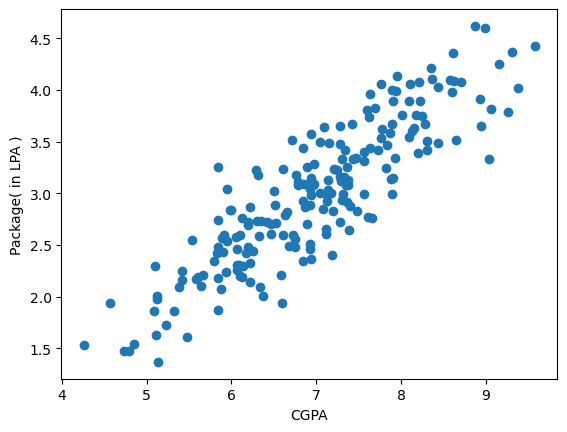

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package( in LPA )')

In [5]:
# we'll separate the input and output data
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
# If you don't specify the random_state in the code, 
# Then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.
# However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer, no matter how many times you execute your code,
# the result would be the same i.e., the same values in train and test datasets.

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #we'll make an object of LinearRegression

In [8]:
lr.fit(x_train,y_train)
# fit is used to train the dataset

LinearRegression()

In [9]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [14]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [15]:
# Now we will predict
lr.predict(x_test.iloc[2].values.reshape(1,1))
# We reshaped this bcs the algorithm expects a 2d data of 1,1 but the test dataset is a 1d data

# og package->4.10 predicted package->3.89
# og package->3.49 predicted package->3.09
# og package->2.08 predicted package->2.38

C:\Users\Anay\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'Package(in LPA)')

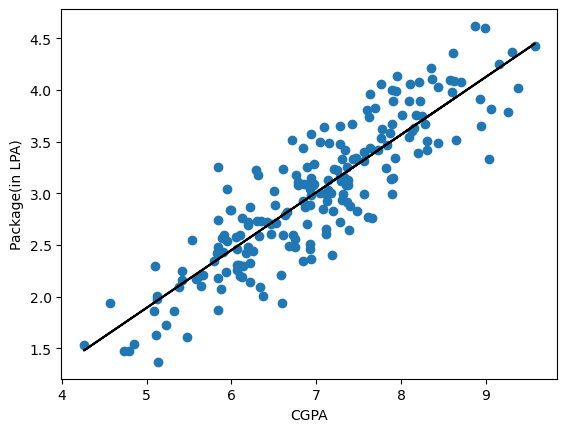

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='black')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')
# this is the LinearRegression line

In [17]:
# how to find the slope of the line(m)
lr.coef_

array([0.55795197])

In [18]:
# Intercept of the line(b)
lr.intercept_

-0.8961119222429144

In [78]:
# y = mx + b

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# we just have to input 2 details i.e. y_test(actual value of y) and predicted values of y

In [38]:
y_pred = lr.predict(x_test)

In [36]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [40]:
print(f'MAE is {mean_absolute_error(y_test,y_pred)} LPA.')

MAE is 0.2884710931878175 LPA.


In [44]:
print(f'MSE is {mean_squared_error(y_test,y_pred)} LPA^2.')

MSE is 0.12129235313495527 LPA^2.


In [46]:
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,y_pred))} LPA.')

RMSE is 0.34827051717731616 LPA.


In [50]:
print(f'R2 score is {r2_score(y_test,y_pred)}')
r2 = r2_score(y_test,y_pred)

R2 score is 0.780730147510384


In [52]:
# adjusted r2 score 
x_test.shape

(40, 1)

In [54]:
1 - ((1-r2)*(40-1))/(40-1-1)

0.7749598882343415